In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Exploratory Data Analysis

## Age
### conclusion

- Age is almost normally distributed
- 20% of the values are missing
- There are some outliers

In [4]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot: ylabel='Density'>

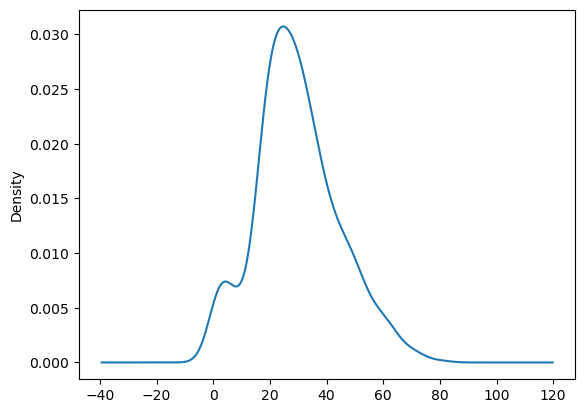

In [5]:
df.Age.plot(kind='kde')

In [6]:
df.Age.skew()

0.38910778230082704

<AxesSubplot: >

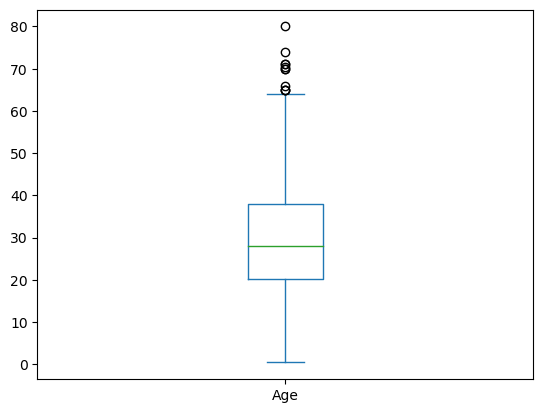

In [7]:
df.Age.plot(kind='box')

In [8]:
df[df.Age >=65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [9]:
df.Age.isnull().sum()/len(df.Age)

0.19865319865319866

### Fare
#### Conclusions
- The data is highly (positively) skewed
- Fare col actually contains the group fare and not the individual fare (this might be an issue)
- We need to create a new col called individual fare
-

In [10]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot: ylabel='Frequency'>

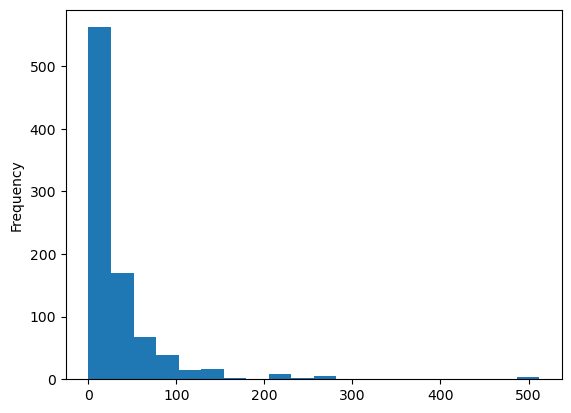

In [11]:
df.Fare.plot(kind='hist',bins=20)

<AxesSubplot: ylabel='Density'>

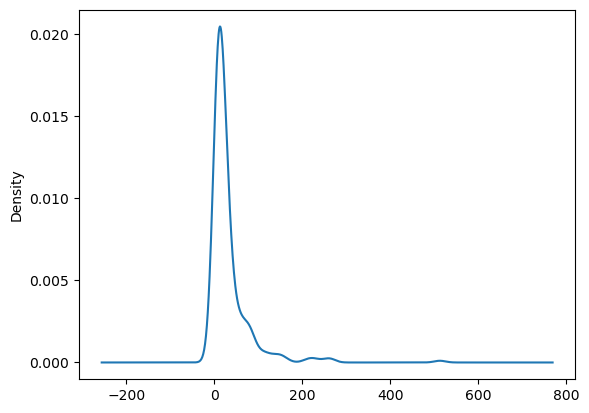

In [12]:
df.Fare.plot(kind='kde')

In [13]:
df.Fare.skew()

4.787316519674893

<AxesSubplot: >

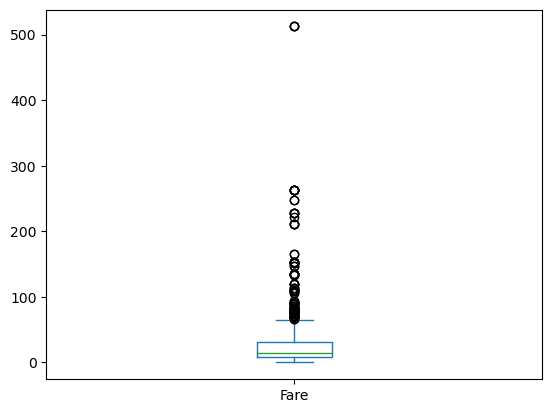

In [14]:
df.Fare.plot(kind='box')

In [15]:
df[df.Fare > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [16]:
df.Fare.isnull().sum()

0

### Sruvived

**conclusions**
1. Surprisingly less people travelled in pclass 2 and more in pclass 1
2. Parch and Sibsp can be merged to form a new column called family size
3. Create a new column called is_alone

In [17]:
# categorical data

In [18]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: >

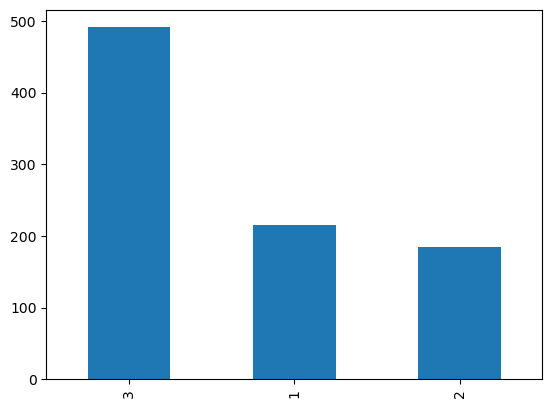

In [19]:
df.Pclass.value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Pclass'>

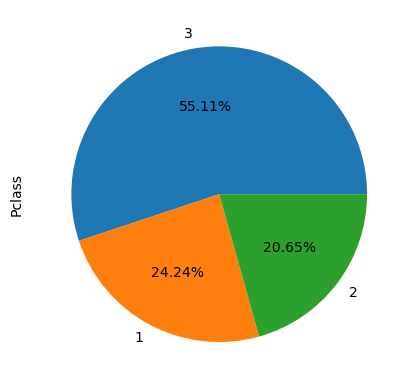

In [20]:
df.Pclass.value_counts().plot(kind='pie',autopct="%0.2f%%")

In [21]:
df.Survived.isnull().sum()

0

In [22]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot: >

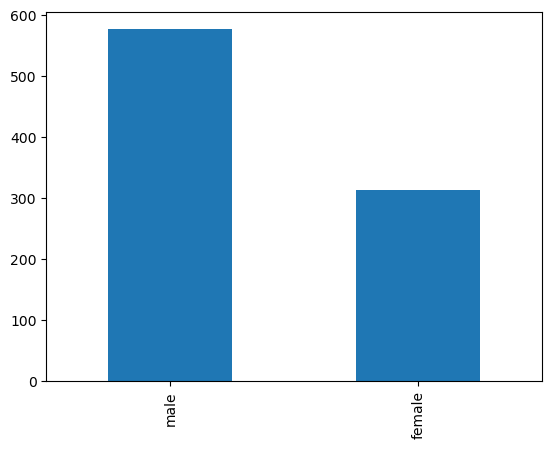

In [23]:
df.Sex.value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Sex'>

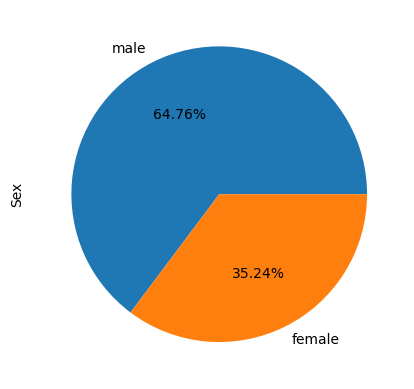

In [24]:
df.Sex.value_counts().plot(kind='pie',autopct="%0.2f%%")

In [25]:
df.Sex.isnull().sum()

0

In [26]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot: >

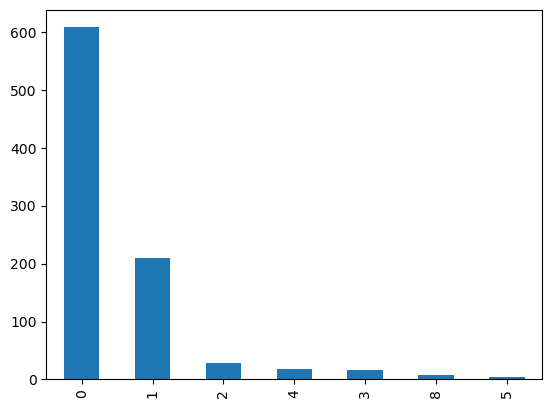

In [27]:
df.SibSp.value_counts().plot(kind='bar')

<AxesSubplot: ylabel='SibSp'>

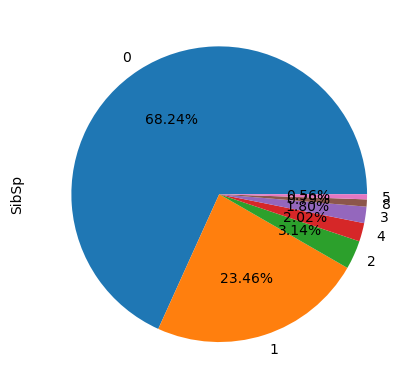

In [28]:
df.SibSp.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [29]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot: >

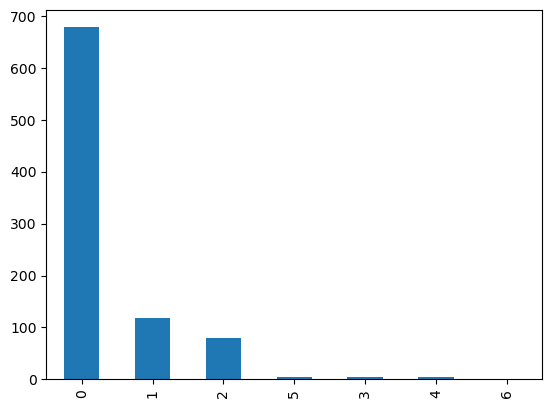

In [30]:
df.Parch.value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Parch'>

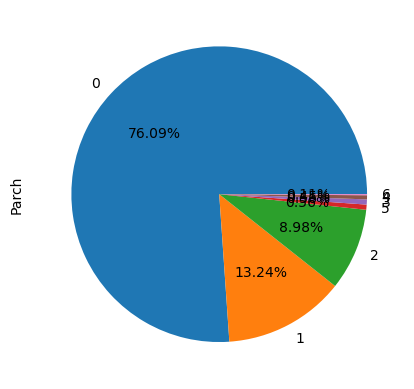

In [31]:
df.Parch.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [32]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot: >

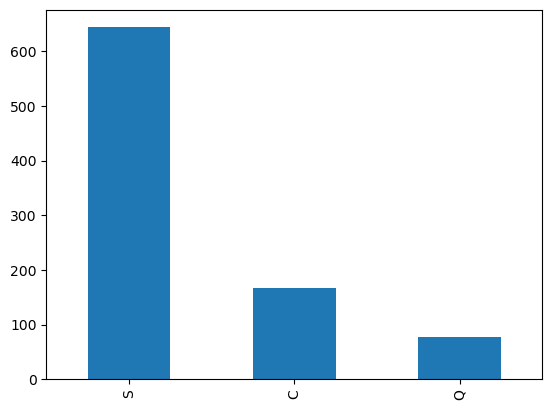

In [33]:
df.Embarked.value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Embarked'>

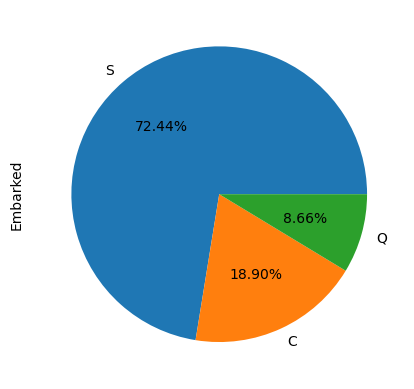

In [34]:
df.Embarked.value_counts().plot(kind='pie',autopct='%0.2f%%')

### Mixed columns
1. Need to feature engineer mixed columns to get more insights

## Bivariate analysis

1. Pclass 3 was most dangerous and Pclass 1 was the safest
2. Females had higher chance of survival
3. Age is a very important predictor for survivor

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

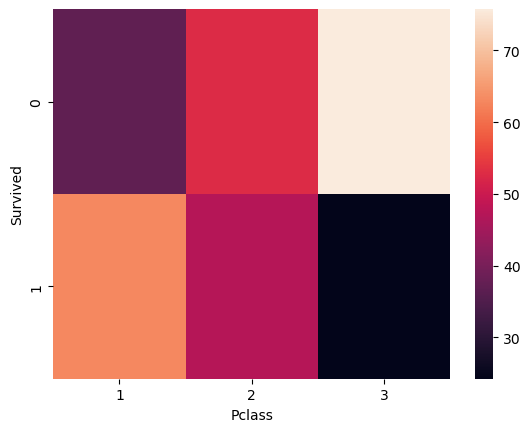

In [36]:
sns.heatmap(pd.crosstab(df.Survived,df.Pclass,normalize='columns')*100)

In [37]:
(pd.crosstab(df.Survived,df.Sex,normalize='columns')*100)

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [38]:
(pd.crosstab(df.Survived,df.Embarked,normalize='columns')*100)

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [39]:
pd.crosstab(df.Sex,df.Embarked,normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [40]:
pd.crosstab(df.Pclass,df.Embarked,normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


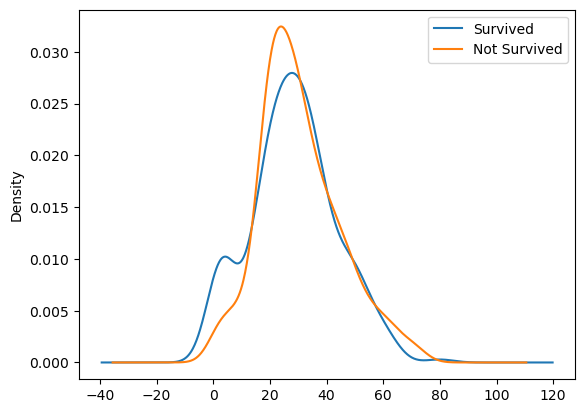

In [41]:
df[df.Survived == 1]['Age'].plot(kind='kde',label='Survived')
df[df.Survived == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

### kids and elders had higher chance of survival

In [42]:
df[df.Pclass == 1]['Age'].mean()

38.233440860215055

#### Fare column feature engineering

In [43]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [44]:
df[df.Ticket == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [45]:
df[df.Name.str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [46]:
df1 = pd.read_csv('test.csv')

In [47]:
df = pd.concat([df,df1])

In [48]:
df[df.Ticket == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [49]:
df.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [50]:
df[df.Ticket == 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [51]:
df['individual_fare'] = df.Fare/(df.SibSp + df.Parch + 1)

<AxesSubplot: >

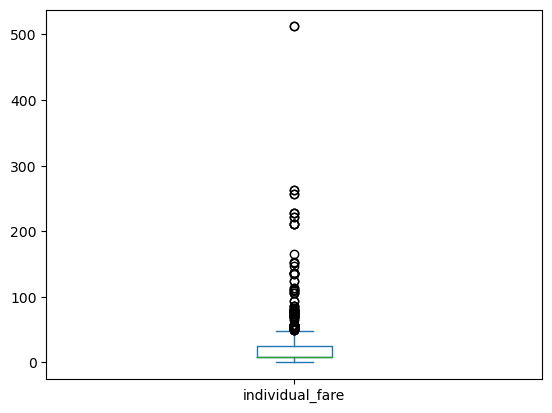

In [52]:
df.individual_fare.plot(kind='box')

In [53]:
df[['individual_fare','Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [54]:
df['family_size'] = df.SibSp + df.Parch + 1

In [55]:
#family_type
#1 = alone
#2-4 => small
# >5 => large

def transform_family_size(num):

    if num == 1:
        return 'alone'
    elif num>1 and num<3:
        return 'small'
    else:
        return 'large'

In [56]:
df['family_type'] = df.family_size.apply(transform_family_size)

In [57]:
pd.crosstab(df.Survived,df.family_type,normalize='columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,53.367876,44.720497
1.0,30.353818,46.632124,55.279503


#### small family higher chance of survival

In [61]:
df['surname'] = df.Name.str.split(",").str.get(0)

In [70]:
df['title'] = df['Name'].str.split(",").str.get(1).str.strip().str.split().str.get(0)

In [71]:
df.title.value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: title, dtype: int64

In [97]:
def title_clean(string):
    if string in ['Rev.','Dr.','Col.','Major.','Don.','Capt.','the','Jonkheer.']:
        return 'other'
    else:
        return string

In [98]:
df.title = df.title.apply(title_clean)

In [99]:
df.title.value_counts()

Mr.        757
Miss.      260
Mrs.       197
Master.     61
other       26
Ms.          2
Mlle.        2
Mme.         1
Lady.        1
Sir.         1
Dona.        1
Name: title, dtype: int64

In [106]:
temp_df = df[df.title.isin(['Mr.','Miss.','Mrs.','Master.','other'])]

In [107]:
pd.crosstab(temp_df.Survived,temp_df.title,normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,71.428571
1.0,57.5,69.78022,15.667311,79.2,28.571429


In [110]:
df.Cabin.isnull().sum()/len(df.Cabin)

0.774637127578304

In [112]:
df.Cabin.value_counts().head(15)

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
E34                3
B58 B60            3
A34                3
E101               3
C101               3
Name: Cabin, dtype: int64

In [114]:
df.Cabin.fillna('M',inplace=True)

In [115]:
df.Cabin.value_counts()

M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: Cabin, Length: 187, dtype: int64

In [116]:
df['deck'] =df.Cabin.str[0]

In [118]:
df.deck.value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: deck, dtype: int64

In [120]:
pd.crosstab(df.deck,df.Pclass)

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<AxesSubplot: xlabel='deck'>

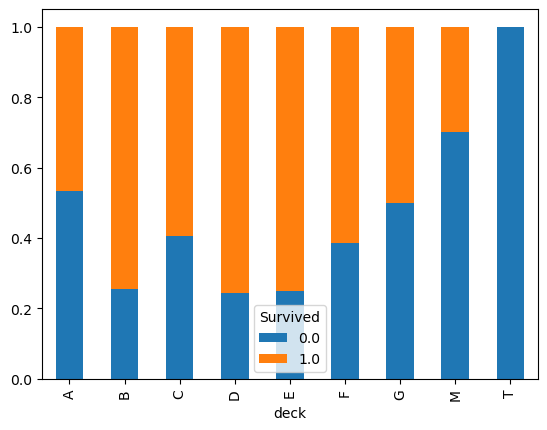

In [127]:
pd.crosstab(df.deck,df.Survived,normalize='index').plot(kind='bar',stacked=True)